# Point cloud SubSampling with PythonLidar

## Imports

In [1]:
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
from python_lidar import PythonLidar
pl = PythonLidar(epsg=4326)

2021-08-25 01:48:07,106 — FileHandler — INFO — usgs_3dep_metadata read successfully


## Fetch USGS 3DEP Lidar data

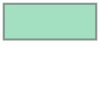

In [4]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
polygon

In [5]:
gdf = pl.fetch_lidar(polygon, ["IA_FullState"])
gdf

2021-08-25 01:48:07,345 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-25 01:48:07,345 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-25 01:48:49,535 — GetData — INFO — successfully read geodata: IA_FullState_-10436887.43333523_-10435905.484106943_5148706.389047223_5149217.145836505


[{'year': nan,
  'region': 'IA_FullState',
  'geo_data':         elevation                    geometry
  0          318.49  POINT (-93.74734 41.92142)
  1          318.48  POINT (-93.74744 41.92142)
  2          318.42  POINT (-93.74738 41.92141)
  3          318.58  POINT (-93.74735 41.92140)
  4          318.29  POINT (-93.74748 41.92142)
  ...           ...                         ...
  213993     318.10  POINT (-93.74757 41.92141)
  213994     318.22  POINT (-93.74788 41.92140)
  213995     318.06  POINT (-93.74798 41.92140)
  213996     317.89  POINT (-93.74817 41.92140)
  213997     317.59  POINT (-93.74858 41.92108)
  
  [213998 rows x 2 columns]}]

In [6]:
df = gdf[0]['geo_data']

In [7]:
sub_sampler = pl.get_sub_sampler(32643, df)
sub_sampler.df

,elevation,geometry
0,318.49,POINT (-433687.730 15293200.768)
1,318.48,POINT (-433679.141 15293202.031)
2,318.42,POINT (-433684.361 15293202.563)
3,318.58,POINT (-433687.463 15293202.870)
4,318.29,POINT (-433675.873 15293202.239)
...,...,...
213993,318.10,POINT (-433668.545 15293204.764)
213994,318.22,POINT (-433643.559 15293209.463)
213995,318.06,POINT (-433635.131 15293209.713)
213996,317.89,POINT (-433619.326 15293212.056)


In [8]:
sample_df = sub_sampler.decimation(20)
sample_df

,elevation,geometry
0,318.49,POINT (-433687.730 15293200.768)
1,318.17,POINT (-433674.254 15293206.177)
2,318.05,POINT (-433674.970 15293208.306)
3,318.01,POINT (-433664.153 15293209.494)
4,318.27,POINT (-433686.824 15293213.374)
...,...,...
10695,318.31,POINT (-433638.040 15293417.984)
10696,316.89,POINT (-433702.527 15293334.643)
10697,317.42,POINT (-433647.398 15293299.763)
10698,317.52,POINT (-433618.155 15293270.098)


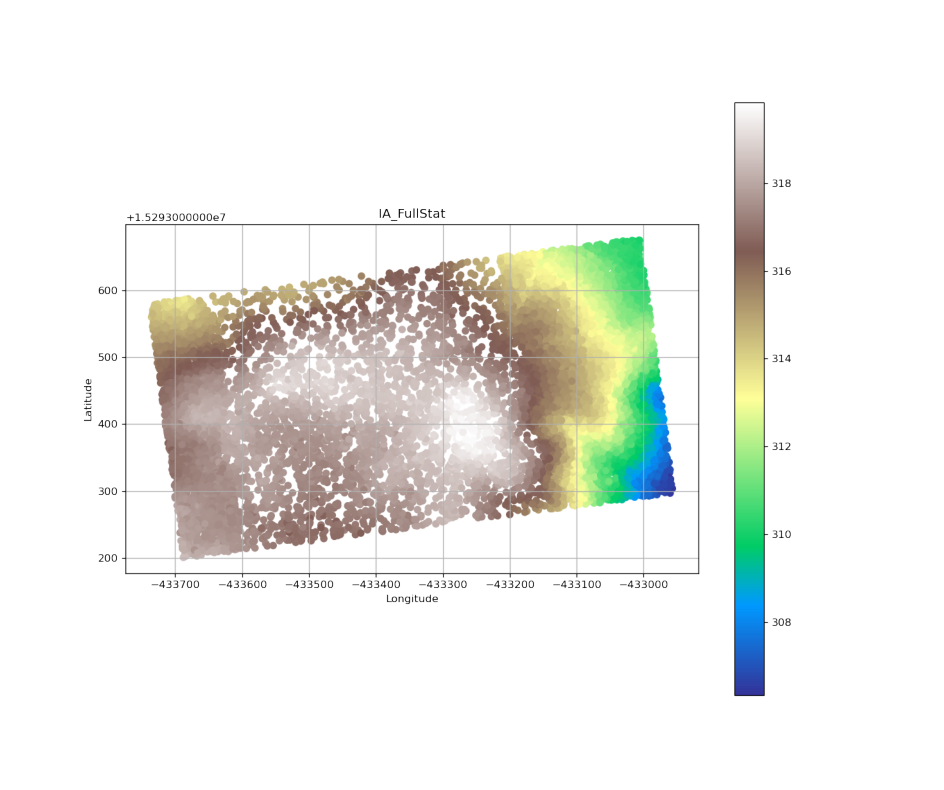

In [9]:
vis = pl.get_renderer(sample_df)
vis.plot_heatmap("IA_FullStat")

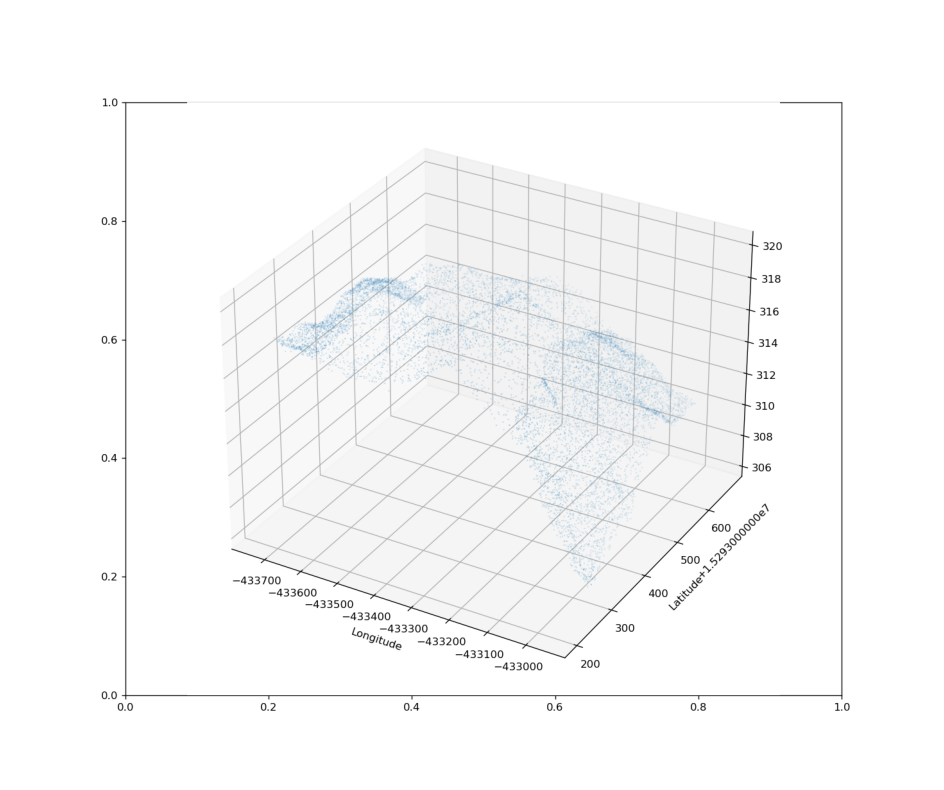

In [10]:
vis.render_3d()

In [11]:
sample_df = sub_sampler.grid_barycenter(5)
sample_df

,elevation,geometry
0,314.900000,POINT (-433733.289 15293540.223)
1,314.807500,POINT (-433733.468 15293543.941)
2,314.748750,POINT (-433733.702 15293547.688)
3,314.557143,POINT (-433733.803 15293552.979)
4,314.496500,POINT (-433734.373 15293557.763)
...,...,...
12012,306.432727,POINT (-432956.602 15293298.541)
12013,306.504000,POINT (-432957.017 15293302.573)
12014,306.496667,POINT (-432957.246 15293307.455)
12015,306.537143,POINT (-432957.549 15293312.642)


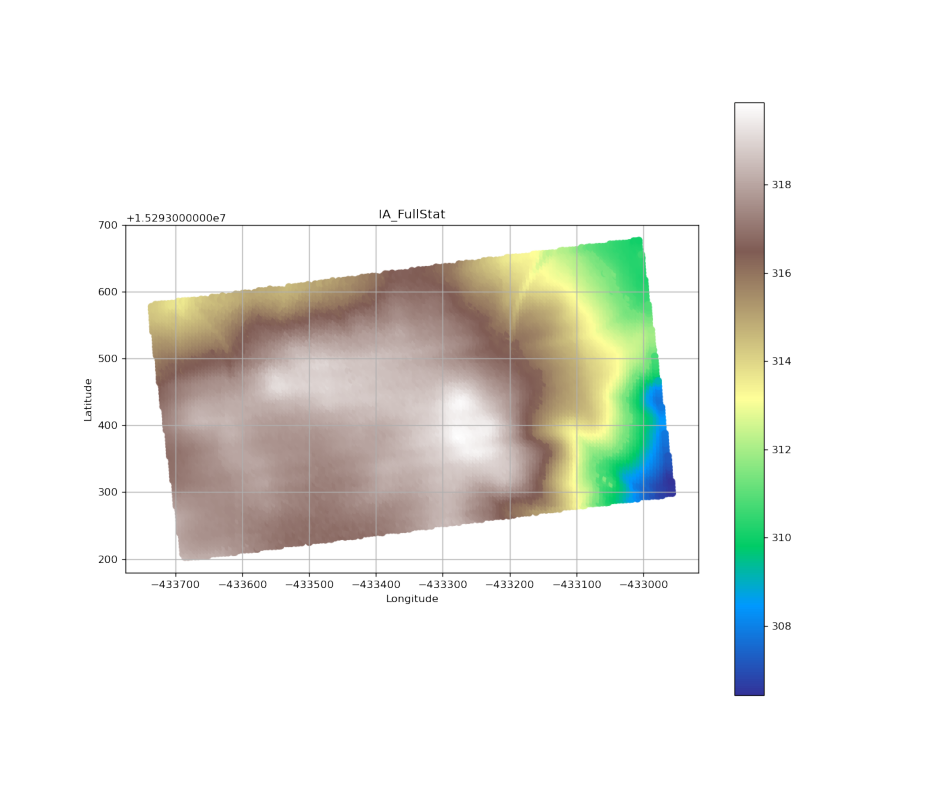

In [12]:
vis = pl.get_renderer(sample_df)
vis.plot_heatmap("IA_FullStat")

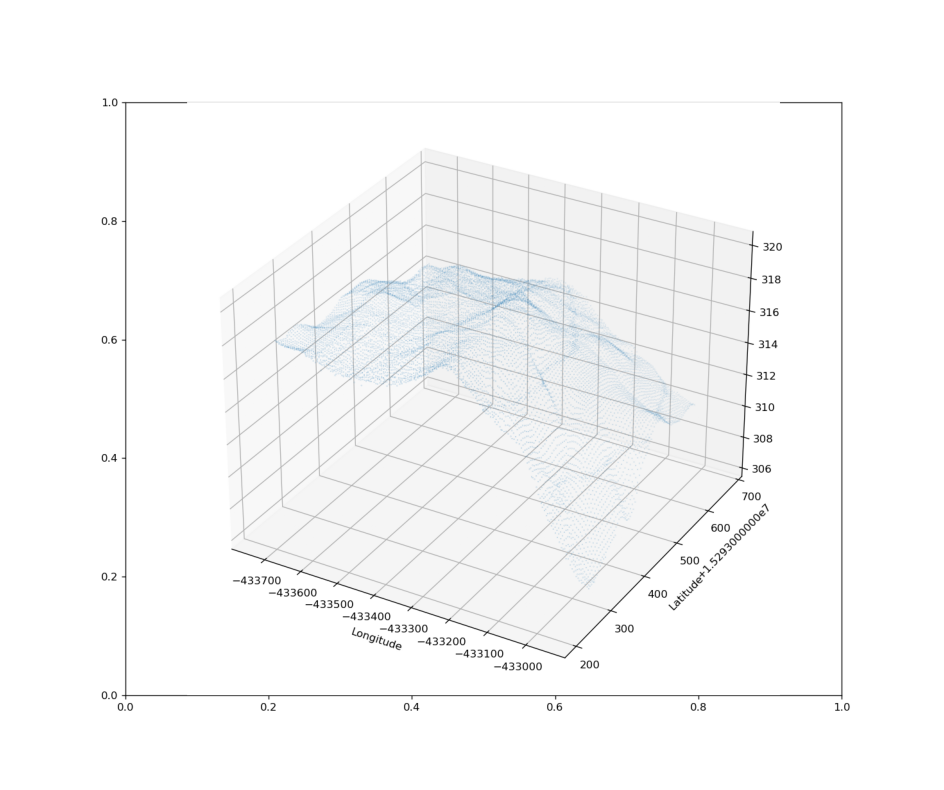

In [13]:
vis.render_3d()

In [14]:
sample_df = sub_sampler.grid_candidate_center(5)
sample_df

,elevation,geometry
0,314.90,POINT (-433733.289 15293540.223)
1,314.74,POINT (-433733.674 15293544.091)
2,314.84,POINT (-433733.429 15293547.219)
3,314.56,POINT (-433733.587 15293552.412)
4,314.36,POINT (-433734.273 15293558.314)
...,...,...
12012,306.32,POINT (-432956.927 15293298.275)
12013,306.54,POINT (-432957.352 15293302.327)
12014,306.52,POINT (-432956.742 15293307.568)
12015,306.49,POINT (-432957.266 15293312.712)


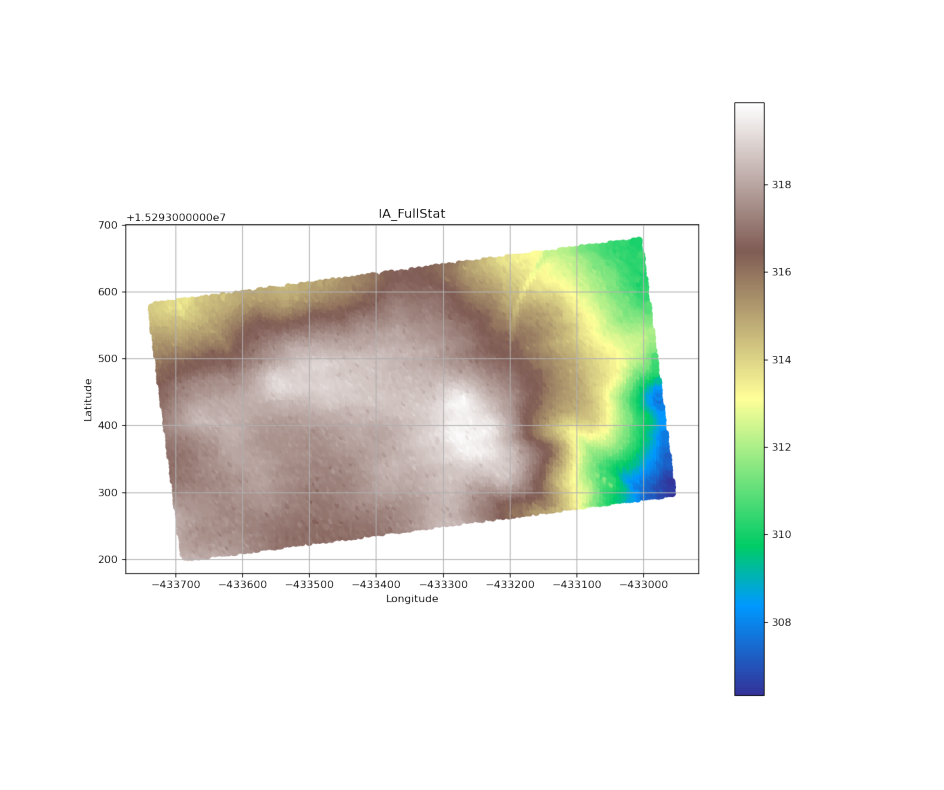

In [15]:
vis = pl.get_renderer(sample_df)
vis.plot_heatmap("IA_FullStat")


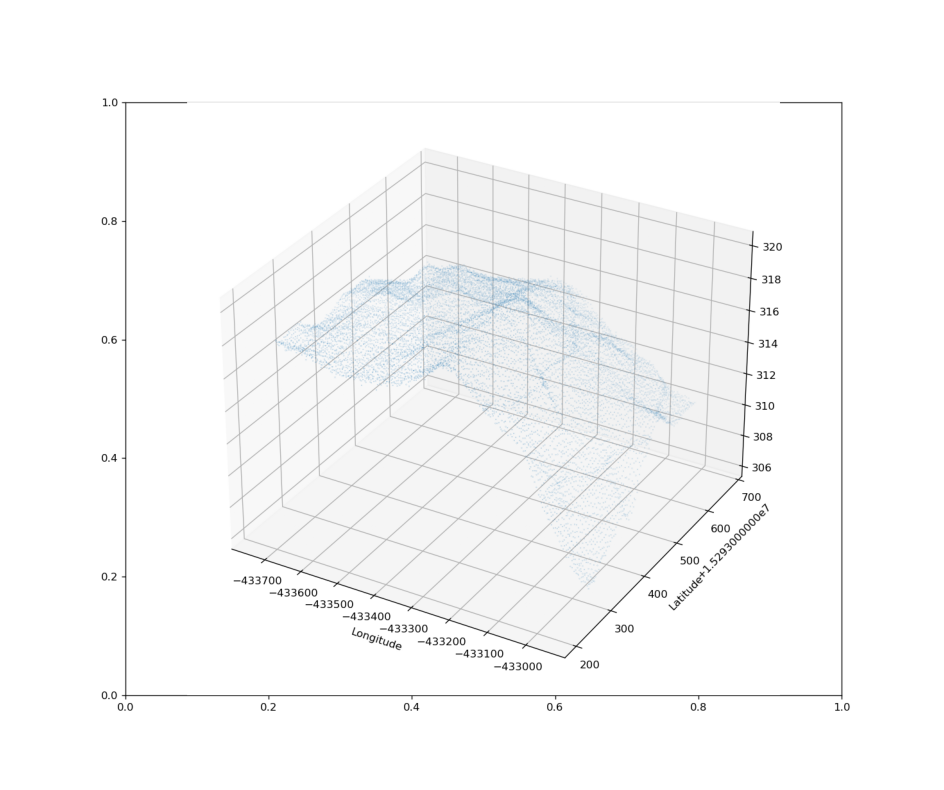

In [16]:
vis.render_3d()